In [48]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%precision 3

'%.3f'

# t-검정

### 가설 검정단계

- 1단계. 가설 설정
- 2단계. 유의수준을 설정(α=0.05)
- 3단계. 검정 통계량 및 p-value 계산
- 4단계. 귀무가설 기각 여부 판단 => p-value < α 이면 귀무가설 기각

#### p-value란?

- 검정과정에서 밝혀진 유의수준

## 1. 단일표본과 모집단의 평균차이 검정

- 양측검정
    - 귀무가설($H_0$) : $ \mu = \mu_0 $
    - 대립가설($H_1$) : $ \mu \ne \mu_0 $
    
- 좌측검정
    - 귀무가설($H_0$) : $ \mu = \mu_0 $
    - 대립가설($H_1$) : $ \mu < \mu_0 $
    
- 우측검정
    - 귀무가설($H_0$) : $ \mu = \mu_0 $
    - 대립가설($H_1$) : $ \mu > \mu_0 $

### 1) one sample Z-test

- 모분산을 아는 경우
- 표본데이터가 충분히 많은 경우
- 검정통계량 : $ Z = {{\bar X - \mu} \over {\sigma \over \sqrt n }} \sim N(0,1) $ 

#### 예제.
A교수는 지난 20년 동안 1000명의 학생들을 대상으로 통계학개론을 강의하였다. 올해도 36명을 대상으로 통계학개론을 강의하고 있다고 한다. 이번 학기 학생들이 지난 과거의 학생들과 다른지 알고 싶다. 과거 1000명 학생들의 통계학
개론 평균점수는 99점이고 표준편차는 2.5이고, 이번 학기 학생들의 평균은 100, 표준편차는 5라고 한다. 이번 학기 학생들은 지난 과거 학생들과 다르다고 말할 수 있을까?

#### 가설검정 단계
1. 가설설정
- 귀무가설($H_0$) : $ \mu = 99 $
- 대립가설($H_1$) : $ \mu \ne 99 $


2. 유의수준 $\alpha = 0.05$


3. 검정통계량 계산 


4. p값 계산하여 유의수준과 비교 후 귀무가설 기각여부 판단

In [5]:
p_mean, p_std, s_mean, s_std, n, alpha = 99, 2.5, 100, 5, 36, 0.05

z = (s_mean - p_mean) / (p_std/np.sqrt(n))
print(f'검정통계량 : {z:.4f}')

rv = stats.norm()
p_value = 1-rv.cdf(z) if z>0 else rv.cdf(z)*2
print(f'p-value: {p_value:.4f}')

print('Reject H0' if p_value < alpha else 'Accept H0')

검정통계량 : 2.4000
p-value: 0.0082
Reject H0


### 2) one sample t-test

- 모분산을 모르는 경우
- 검정통계량 : $ t = {{\bar X - \mu} \over {S \over \sqrt n }} \sim t(n-1) $ 
- 표본의 크기 커질수록 t-분포는 정규분포로 근사하므로 모분산대신에 표본분산을 사용한 one sample Z-검정과 같은 결과가 나옴

In [8]:
p_mean, p_std, s_mean, s_std, n, alpha = 99, 2.5, 100, 5, 36, 0.05

t = (s_mean - p_mean) / (s_std/np.sqrt(n))
print(f'검정통계량 : {t:.4f}')

rv = stats.t(n-1)
p_value = (1-rv.cdf(z))*2 if z>0 else rv.cdf(z)*2
print(f'p-value: {p_value:.4f}')

print('Reject H0' if p_value < alpha else 'Accept H0')

검정통계량 : 1.2000
p-value: 0.0218
Reject H0


### scipy.stats의 ttest_1samp() 함수

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp

#### 문제. 초등학생 신체데이터

2018년 초등학생 키와 몸무게 자료이다. 초등학교 6학년 남학생의 평균키는 152.5라고 한다. 2018년에 표본조사된 6학년 남학생의 키는 152.5보다 큰가? 유의수준 5%에서 가설검정을 수행하시오.

## 2. 두 집단의 평균차이 검정

- 대응표본(종속관계) t-검정 
- 독립표본 t-검정

### 1) 대응표본(paired) t-test

짝지은 두 그룹의 차이값에 대한 단일표본 t-test 적용

#### 가설검정 단계

1. 데이터를 건강식품 복용전과 후의 몸무게 차이를 계산한 데이터로 변환


2. 일표본 t-test 과정으로 검정 수행
    - **scipy.stats.ttest_rel()**

#### 예제

A제약회사에서 개발한 건강식품이 체중 조절에 효과가 있는지 실험하기 위해 20명을 대상으로 건강식품 복용 전과 후의 몸무게를 측정하였다. 이 건강식품이 체중 조절에 효과가 있는가(체중이 감소되었는가)? 유의수준을 5%, 1%로 두었을 때 가설검정을 수행하시오.

In [9]:
data = np.array([[75, 73],[74, 74],[75, 76],[75, 71],[83, 76],
                 [77, 68],[82, 75],[62, 61],[77, 68],[82, 75],
                 [72, 70],[75, 71],[78, 71],[71, 70],[68, 67],
                 [76, 73],[71, 74],[54, 50],[75, 76],[77, 68]])

- 일표본 t-검정

In [10]:
before = data[:,0]
after = data[:,1]
diff = before - after
diff

array([ 2,  0, -1,  4,  7,  9,  7,  1,  9,  7,  2,  4,  7,  1,  1,  3, -3,
        4, -1,  9])

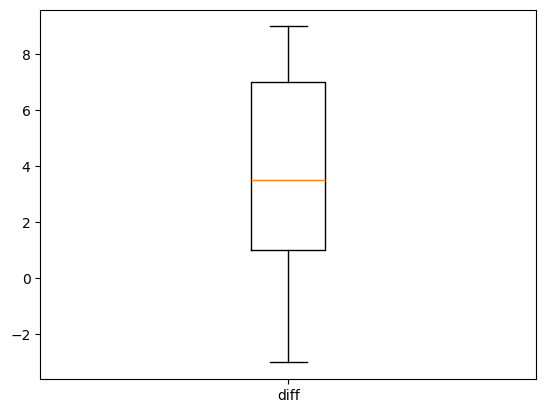

In [13]:
plt.boxplot(diff)
plt.xticks([1], ['diff'])
plt.show()

In [17]:
s_mean, s_std, s_skew = diff.mean(), diff.std(), stats.skew(diff)
s_mean, s_std, s_skew

(3.600, 3.597, 0.043)

In [14]:
stats.ttest_1samp(diff, popmean=0, alternative='two-sided') #양측검정

TtestResult(statistic=4.362266189267664, pvalue=0.00033530219011457306, df=19)

In [15]:
stats.ttest_1samp(diff, popmean=0, alternative='greater')

TtestResult(statistic=4.362266189267664, pvalue=0.00016765109505728653, df=19)

-> 귀무가설을 기각하므로 체중조절에 효과가 있다고 말할 수 있다

- 체중이 감소되었는지 가설검정을 수행

In [18]:
before = data[:,0]
after = data[:,1]
diff = before - after
diff

array([ 2,  0, -1,  4,  7,  9,  7,  1,  9,  7,  2,  4,  7,  1,  1,  3, -3,
        4, -1,  9])

In [38]:
# 1. 가설설정 - 체중 감소되었다
# 2. 귀무가설(𝐻0), 대립가설(𝐻1) - 체중 같다, 체중 감소
# 3. 유의수준 𝛼=0.05, 𝛼=0.01
# 4. 검정통계량 계산
# 5. p값 계산하여 유의수준과 비교 후 귀무가설 기각여부 판단

s_mean, s_std, n, p_mean = diff.mean(), diff.std(ddof=1), len(diff), 0
alpha = 0.05
# alpha = 0.01

# 검정통계량
t = (s_mean - p_mean) / (s_std / np.sqrt(n))
print(f'검정통계량 : {t:.4f}')

# 임계값
cri = stats.t(n-1).isf(alpha)
print(f'임계값 : {cri:.4f}')

# p값 계산
p_value = (1-stats.t(n-1).cdf(t)) if t>0 else (stats.t(n-1).cdf(t))*2
print(f'p-value: {p_value:.6f}')
print('Reject H0' if p_value < alpha else 'Accept H0')

검정통계량 : 4.3623
임계값 : 1.7291
p-value: 0.000168
Reject H0


#### 일표본 t-검정 수행 기준
- 자료 유형 : 반응변수 - 연속형, 설명변수 - 그룹1개(범주형)
- Z검정 : 모분산을 아는 경우
- t검정 : 모분산을 모르는 경우
- 표본의 크기 :
    - 대표본인 경우(n>=30) t검정 (모집단의 분포가 정규분포-정규성만족)
    - 소표본인 경우 :
        - 정규성을 만족하지 않는 경우 : 비모수적 방법(Wilcoxon rank sum test)
        - 정규성을 만족하는 경우 : t검정

#### 정규성 검정
- 샤피로-윌크 테스트(Shapiro-Wilk test)
- scipy.stats.shapiro()

In [49]:
stats, pval = stats.shapiro(diff)
alpha = 0.05
print('Reject H0' if pval < alpha else 'Accept H0')
print(pval)

# p-value < 0.05: 귀무가설 기각 (통계적으로 유의미한 결과)
# p-value ≥ 0.05: 귀무가설 채택 (통계적으로 유의미하지 않은 결과)

Accept H0
0.21451647579669952


In [50]:
df = pd.read_csv('data/potato.csv')
df.head()

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05


In [52]:
from scipy import stats
stats.shapiro(df.무게)

ShapiroResult(statistic=0.9412717223167419, pvalue=0.4348631501197815)

In [53]:
stats.ttest_1samp(df.무게, 130)

TtestResult(statistic=-1.4551960206404198, pvalue=0.16933464230414275, df=13)

#### paired t-test 함수 적용

- 데이터 분포 시각화

In [54]:
data = np.array([[75, 73],[74, 74],[75, 76],[75, 71],[83, 76],
                 [77, 68],[82, 75],[62, 61],[77, 68],[82, 75],
                 [72, 70],[75, 71],[78, 71],[71, 70],[68, 67],
                 [76, 73],[71, 74],[54, 50],[75, 76],[77, 68]])

before = data[:,0]
after = data[:,1]
diff = before - after
diff

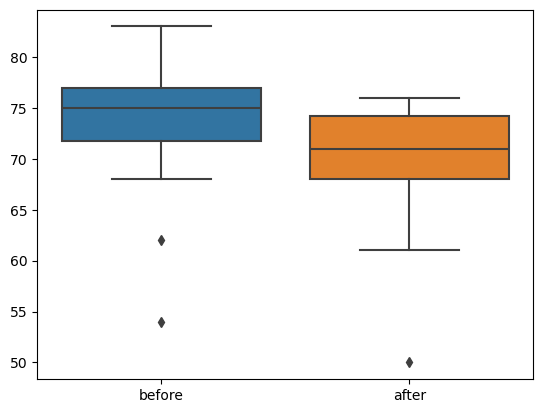

In [55]:
sns.boxplot(data=data)
plt.xticks([0,1],['before', 'after'])
plt.show()

- 정규성 검정

In [56]:
stats.shapiro(before)

ShapiroResult(statistic=0.8608343601226807, pvalue=0.008140737190842628)

In [57]:
stats.shapiro(after)

ShapiroResult(statistic=0.7824622988700867, pvalue=0.0004786155477631837)

- 비모수적 검정 : Wilcoxon

In [58]:
stats.wilcoxon(before, after)

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=14.5, pvalue=0.0011431765973566523)

In [59]:
stats.wilcoxon(before-after)

WilcoxonResult(statistic=14.5, pvalue=0.0011431765973566523)

- paired t-test 함수 적용

In [60]:
stats.ttest_rel(before, after)

TtestResult(statistic=4.362266189267664, pvalue=0.00033530219011457306, df=19)

### 2) 독립표본 t-test

독립된 두 모집단의 평균차이 검정

#### 가설검정 단계

1. 데이터 시각화(분포분석)


2. 정규성 검정
    - shapiro-wilk test
    - 정규성 만족하지 않는 경우 비모수적 평균차이 검정 : Mann Whiteny U test
    

3. 등분산성 검정
    - Levene test : stats.levene()
    - Flinger test : stats.flinger()
    - Bartlet test : stats.bartlett()


4. 검정통계량과 p값 계산하여 기각여부 판단
    - stats.ttest_ind()

#### 예제
어느 학교에서 학생들을 두 가지 교육방식 (A, B)에 의해 교육을 한 뒤 각 그룹에서 무작위로 10명씩 시험성적 표본을 얻었다. 학생들의 시험성적은 정규분포를 따르며 분산이 252으로 알려져 있다고 한다. 두 교육방식에 의한 성적 차이에 대한 95% 신뢰구간을 구하고, 두 집단 간 성적에 차이가 있는지 양측검정을 수행하시오.

In [61]:
groupA = [215, 258, 248, 270, 291, 299, 244, 265, 250, 260]
groupB = [257, 284, 305, 308, 320, 240, 248, 278, 280, 280]

In [69]:
df = pd.DataFrame({'A': groupA, 'B': groupB})
df

,A,B
0,215,257
1,258,284
2,248,305
3,270,308
4,291,320
5,299,240
6,244,248
7,265,278
8,250,280
9,260,280


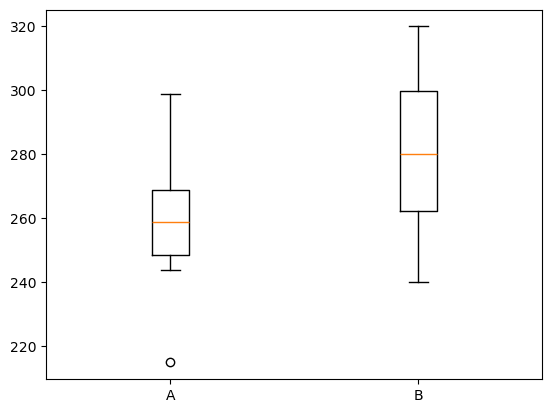

In [71]:
plt.boxplot(df)
plt.xticks([1,2], ['A', 'B'])
plt.show()

- 정규성 검정

In [73]:
stats.shapiro(df.A)

ShapiroResult(statistic=0.9620079398155212, pvalue=0.8085048794746399)

In [74]:
stats.shapiro(df.B)

ShapiroResult(statistic=0.9506453275680542, pvalue=0.6761407256126404)

=> 두 그룹의 데이터는 모두 정규성을 만족함

In [84]:
# a = df.A
# # stats.shapiro(df.A)
# stats.shapiro(a)
# stats.levene(a, df.B)
# stats.ttest_ind(a, df.B, equal_var=True)

- 등분산성 검정
    - H0 : 두 집단의 분산이 같다(등분산이다)

In [75]:
stats.levene(df.A, df.B)

LeveneResult(statistic=0.11090193393804541, pvalue=0.7429671197300978)

In [103]:
np.mean(df.A), np.mean(df.B)

(15.099, 13.872)

In [82]:
stats.ttest_ind(df.A, df.B, equal_var=True)

TtestResult(statistic=-1.7834724523628507, pvalue=0.09137972048711938, df=18.0)

=> 두 그룹의 평균은 차이가 없다 (두 교육방식에는 차이가 없다)

#### 문제1.
두 종류 자동차의 연비 비교하여 차이가 있는지 유의수준 5%에서 가설검정을 수행하시오.

- 시각화
- 정규성 검정
- 등분산성 검정
- 독립표본 t-test 수행

In [119]:
A = [12.60, 15.15,  17.62,  16.81,  15.51,  15.12,  14.39,  15.20,  13.70,  14.75,
     15.13,  15.66,  13.69,  15.74,  14.96,  15.20,  16.45,  13.66,  16.16,  14.47]
B = [13.77,  13.63,  12.63,  14.13,  13.50,  13.09,  13.96,  13.41,  14.03,  14.25, 
    13.47,  13.43,  13.24,  14.61,  13.82,  14.07,  15.96,  13.69,  14.25,  14.50]

In [120]:
df = pd.DataFrame({'A': A, 'B': B})

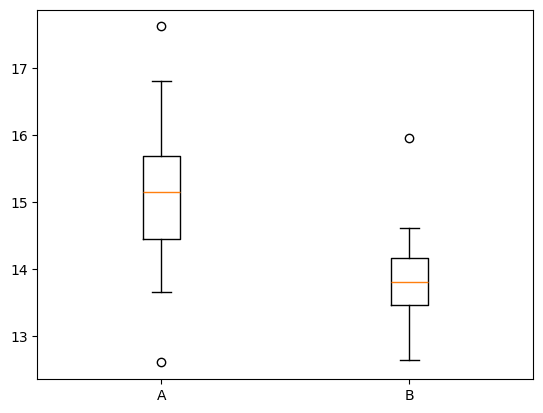

In [121]:
#시각화
plt.boxplot(df)
plt.xticks([1,2], ['A', 'B'])
plt.show()

In [122]:
#정규성 검정
stats.shapiro(A)

ShapiroResult(statistic=0.9804083704948425, pvalue=0.939264714717865)

In [123]:
stats.shapiro(B)

ShapiroResult(statistic=0.9171658158302307, pvalue=0.08739958703517914)

=> 두 그룹의 데이터는 모두 정규성을 만족함

이상치 제거는 데이터 분석에서 중요한 단계입니다. 이상치는 데이터의 전반적인 통계적 특성을 왜곡하고 분석 결과에 부정적인 영향을 미칠 수 있기 때문입니다. 이상치를 제거하는 이유는 다음과 같습니다:

- 데이터 분포 왜곡 방지: 이상치는 데이터의 평균, 표준편차 등 통계량에 큰 영향을 미칠 수 있어 데이터의 본래 분포를 왜곡할 수 있습니다.
- 모델 성능 향상: 이상치는 머신러닝 모델의 학습 과정에서 모델을 오버피팅하거나 잘못된 패턴을 학습하게 만들 수 있습니다. 따라서 모델 성능을 향상시키기 위해 이상치를 제거합니다.
- 정확한 통계 분석: 통계적 가정을 만족하기 위해 이상치를 제거합니다. 예를 들어, 많은 통계적 검정은 데이터가 정규 분포를 따르는 것을 가정합니다.

In [140]:
#이상치 제거 후
a = df.A[(df.A > df.A.min()) & (df.A < df.A.max())]
b = df.B[df.B < df.B.max()]

print(stats.shapiro(a))
print(stats.shapiro(b))

ShapiroResult(statistic=0.9578263759613037, pvalue=0.5602692365646362)
ShapiroResult(statistic=0.9835568070411682, pvalue=0.9754699468612671)


In [141]:
#이상치 제거 후
a = df.A[(df.A > df.A.min()) & (df.A < df.A.max())]
b = df.B[(df.B > df.B.min()) & (df.B < df.B.max())]

print(stats.shapiro(a))
print(stats.shapiro(b))

ShapiroResult(statistic=0.9578263759613037, pvalue=0.5602692365646362)
ShapiroResult(statistic=0.9772162437438965, pvalue=0.9168412089347839)


In [102]:
#등분산성 검정
stats.levene(A, B) #분산 동일함

LeveneResult(statistic=3.082483460226059, pvalue=0.0871982523331269)

In [129]:
#fligner test
stats.fligner(A, B)

FlignerResult(statistic=2.5167951903337924, pvalue=0.1126392957200572)

In [131]:
#Bartlett test
stats.bartlett(A, B)

BartlettResult(statistic=5.046486981498095, pvalue=0.024675919716903333)

=> p-value가 0.05보다 크면 샘플 간의 분산이 동일하다고 판단

In [105]:
# 독립표본 t-test 수행
stats.ttest_ind(A, B, equal_var=True)

TtestResult(statistic=4.010487120208981, pvalue=0.0002737353871039974, df=38.0)

=> p-value가 유의수준(0.05)보다 작기 때문에, 귀무가설(H0)을 기각, 통계적으로 유의미함

=> p-value가 유의수준(0.05)보다 크면 귀무가설 채택

#### 문제2.
제품개발 시 사용하는 화학첨가제의 종류에 따른 제품 수율에 차이가 있는지 유의수준 5%에서 가설 검정을 수행하시오.

In [107]:
A = [68.86, 74.64, 75.80, 76.41, 67.37, 79.98, 74.95, 
     76.36, 72.39, 76.73, 75.56, 73.59, 78.49, 69.49,
     72.38, 73.38, 77.29, 80.43, 73.94, 73.35]
B = [65.92, 64.49, 68.24, 74.38, 70.82, 61.30, 73.09,
     71.20, 74.31, 73.14, 68.76, 71.12, 65.62, 72.11,
     72.20, 76.57, 65.26,  73.82, 71.42, 71.93]

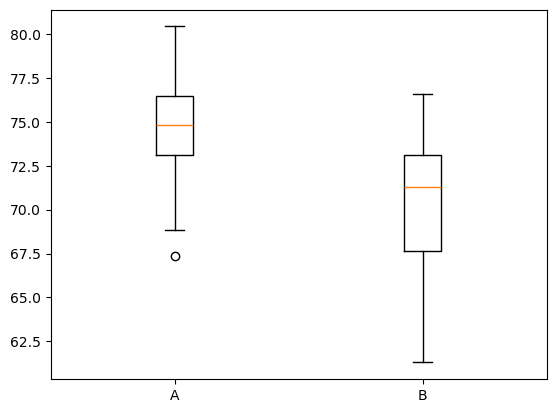

In [108]:
#시각화
df = pd.DataFrame({'A': A, 'B': B})
plt.boxplot(df)
plt.xticks([1,2], ['A', 'B'])
plt.show()

In [109]:
#정규성 검정
stats.shapiro(A)

ShapiroResult(statistic=0.9707767963409424, pvalue=0.7711927890777588)

In [110]:
stats.shapiro(B)

ShapiroResult(statistic=0.9359825849533081, pvalue=0.2011210024356842)

=> 두 그룹의 데이터는 모두 정규성을 만족함

In [112]:
#등분산성 검정
stats.levene(A, B)

LeveneResult(statistic=0.24341187979154805, pvalue=0.6245920666095643)

=> p-value가 0.05보다 크면 샘플 간의 분산이 동일하다고 판단

In [115]:
# 독립표본 t-test 수행
stats.ttest_ind(A, B, equal_var=True)

TtestResult(statistic=3.645069059188556, pvalue=0.0007967396305993584, df=38.0)

=> p-value가 유의수준(0.05)보다 작기 때문에, 귀무가설(H0)을 기각, 통계적으로 유의미함

#### Mann-Whitney U Test
- 정규성을 만족하지 않는 경우 두 독립표본에 대한 평균차이 검정을 위한 비모수적 방법

In [134]:
males = [19,22,16,19,24]
females = [20,11,17,12]

print(stats.shapiro(males))
print(stats.shapiro(females))

ShapiroResult(statistic=0.9604217410087585, pvalue=0.8109170198440552)
ShapiroResult(statistic=0.9118359684944153, pvalue=0.4921836256980896)


In [135]:
np.mean(males), np.std(males, ddof=1)

(20.000, 3.082)

In [136]:
np.mean(females), np.std(females, ddof=1)

(15.000, 4.243)

In [137]:
stats.mannwhitneyu(males, females)

MannwhitneyuResult(statistic=16.0, pvalue=0.17609777149412875)